#  Assignment #3
Exercise 1 Simple neural network

Implement a simple neural network that predicts the class of iris plant basing on its parameters. Use 2 hidden layers. The 
layers should be fully connected with RELu activation function, except for the output layer, which should use softmax 
function. No regularisation or optimalisation are needed. No batching is needed. 


In [1]:
import numpy as np
import pandas as pd

In [6]:
#read Iris db
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
X = iris_df.drop('species', axis=1)

In [9]:
y = iris_df['species']

In [10]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

## Building Model

In [81]:
# split data 70 to 30 percent
# create model with 2 hidden layer
# Train model
# Test Model
# evaluate results

In [11]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y) # put labels in 0 and ones (mutliple lables)

In [12]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [13]:
from sklearn import model_selection

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

In [17]:
# define 2 hidden layer
model.add(Dense(units=100, activation='relu', input_shape=[4,]))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=100, activation='relu'))
# define 1 output layer
model.add(Dense(units=3, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 41,103
Trainable params: 41,103
Non-trainable params: 0
_________________________________________________________________


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [25]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [26]:
scaled_X_train = scaler.transform(X_train)

In [27]:
scaled_X_train

array([[0.35294118, 0.18181818, 0.46428571, 0.375     ],
       [0.58823529, 0.36363636, 0.71428571, 0.58333333],
       [0.61764706, 0.5       , 0.78571429, 0.70833333],
       [0.67647059, 0.45454545, 0.58928571, 0.54166667],
       [0.85294118, 0.72727273, 0.89285714, 1.        ],
       [0.41176471, 0.40909091, 0.55357143, 0.5       ],
       [0.97058824, 0.45454545, 0.98214286, 0.83333333],
       [0.38235294, 0.45454545, 0.60714286, 0.58333333],
       [0.23529412, 0.68181818, 0.05357143, 0.04166667],
       [1.        , 0.36363636, 1.        , 0.79166667],
       [0.44117647, 0.31818182, 0.53571429, 0.375     ],
       [0.26470588, 0.63636364, 0.05357143, 0.04166667],
       [0.20588235, 0.68181818, 0.03571429, 0.08333333],
       [0.23529412, 0.81818182, 0.14285714, 0.125     ],
       [0.20588235, 0.        , 0.42857143, 0.375     ],
       [0.58823529, 0.31818182, 0.67857143, 0.70833333],
       [0.14705882, 0.63636364, 0.14285714, 0.04166667],
       [0.20588235, 0.45454545,

In [29]:
scaled_X_test = scaler.transform(X_test)

In [30]:
scaled_X_test

array([[ 0.52941176,  0.36363636,  0.64285714,  0.45833333],
       [ 0.41176471,  0.81818182,  0.10714286,  0.08333333],
       [ 1.        ,  0.27272727,  1.03571429,  0.91666667],
       [ 0.5       ,  0.40909091,  0.60714286,  0.58333333],
       [ 0.73529412,  0.36363636,  0.66071429,  0.54166667],
       [ 0.32352941,  0.63636364,  0.07142857,  0.125     ],
       [ 0.38235294,  0.40909091,  0.44642857,  0.5       ],
       [ 0.76470588,  0.5       ,  0.71428571,  0.91666667],
       [ 0.55882353,  0.09090909,  0.60714286,  0.58333333],
       [ 0.44117647,  0.31818182,  0.5       ,  0.45833333],
       [ 0.64705882,  0.54545455,  0.71428571,  0.79166667],
       [ 0.14705882,  0.45454545,  0.05357143,  0.        ],
       [ 0.35294118,  0.68181818,  0.03571429,  0.04166667],
       [ 0.17647059,  0.5       ,  0.07142857,  0.        ],
       [ 0.23529412,  0.81818182,  0.07142857,  0.08333333],
       [ 0.58823529,  0.59090909,  0.64285714,  0.625     ],
       [ 0.64705882,  0.

## Training model

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(patience=10)

In [33]:
model.fit(x=X_train, y=y_train, epochs=300,validation_data=(X_test, y_test), verbose=1 ,callbacks=[early_stop])

Epoch 1/300
4/4 [==============================] - 3s 196ms/step - loss: 0.9928 - accuracy: 0.6351 - val_loss: 0.7916 - val_accuracy: 0.7111
Epoch 2/300
4/4 [==============================] - 0s 40ms/step - loss: 0.7696 - accuracy: 0.6986 - val_loss: 0.5982 - val_accuracy: 0.9556
Epoch 3/300
4/4 [==============================] - 0s 40ms/step - loss: 0.6566 - accuracy: 0.8273 - val_loss: 0.4815 - val_accuracy: 1.0000
Epoch 4/300
4/4 [==============================] - 0s 34ms/step - loss: 0.5399 - accuracy: 0.9435 - val_loss: 0.4074 - val_accuracy: 0.8000
Epoch 5/300
4/4 [==============================] - 0s 51ms/step - loss: 0.4808 - accuracy: 0.7943 - val_loss: 0.3478 - val_accuracy: 0.9333
Epoch 6/300
4/4 [==============================] - 0s 43ms/step - loss: 0.4030 - accuracy: 0.9154 - val_loss: 0.3066 - val_accuracy: 0.8889
Epoch 7/300
4/4 [==============================] - 0s 41ms/step - loss: 0.3755 - accuracy: 0.8585 - val_loss: 0.2886 - val_accuracy: 0.8444
Epoch 8/300
4/4 [==

## model evaluation

In [34]:
metrics = pd.DataFrame(model.history.history)

In [35]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.958106,0.647619,0.791631,0.711111
1,0.758740,0.676190,0.598162,0.955556
2,0.652290,0.771429,0.481470,1.000000
3,0.530223,0.923810,0.407391,0.800000
4,0.461723,0.819048,0.347803,0.933333
5,0.408994,0.923810,0.306587,0.888889
6,0.379969,0.828571,0.288615,0.844444
7,0.335208,0.866667,0.247375,0.977778
8,0.306076,0.942857,0.225047,0.977778
9,0.267769,0.971429,0.214096,0.933333


<AxesSubplot:>

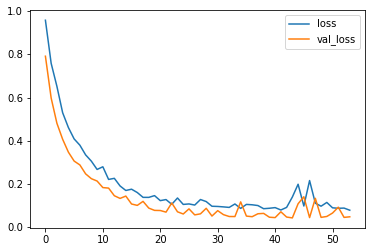

In [36]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

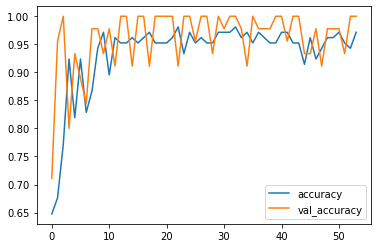

In [37]:
metrics[['accuracy','val_accuracy']].plot()

In [38]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.4262029528617859, 0.9555555582046509]